In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from pydataset import data
import acquire
import prepare
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

- ### Create a model that includes only age, fare, and pclass. Does this model perform better than your baseline?

In [2]:
df = pd.read_csv('titanic_df.csv')
df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
df = prepare.prep_titanic(df)
df

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
0,0,0,3,male,22.0,1,0,7.2500,Southampton,0,0,1,1
1,1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,Southampton,1,0,1,0
3,3,1,1,female,35.0,1,0,53.1000,Southampton,0,0,1,0
4,4,0,3,male,35.0,0,0,8.0500,Southampton,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,885,0,3,female,39.0,0,5,29.1250,Queenstown,0,1,0,0
886,886,0,2,male,27.0,0,0,13.0000,Southampton,1,0,1,1
887,887,1,1,female,19.0,0,0,30.0000,Southampton,1,0,1,0
889,889,1,1,male,26.0,0,0,30.0000,Cherbourg,1,0,0,1


In [4]:
df = df.drop(columns = ['sex', 'embark_town', 'Unnamed: 0'])
df

,survived,pclass,age,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
0,0,3,22.0,1,0,7.2500,0,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,1,0,0
886,0,2,27.0,0,0,13.0000,1,0,1,1
887,1,1,19.0,0,0,30.0000,1,0,1,0
889,1,1,26.0,0,0,30.0000,1,0,0,1


In [5]:
 def split_data(df, target=''):
        train, test = train_test_split(df, 
                               train_size = 0.8,
                               random_state=42,
                              stratify=df[target])
        train, val = train_test_split(train,
                             train_size = 0.7,
                             random_state=42,
                             stratify=train[target])
        return train, val, test
train, val, test = split_data(df, target= 'survived')

train.shape, val.shape, test.shape

((398, 10), (171, 10), (143, 10))

In [6]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_val = val.drop(columns=['survived'])
y_val = val.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [7]:
X_train

,pclass,age,sibsp,parch,fare,alone,embark_town_Queenstown,embark_town_Southampton,sex_male
272,2,41.0,0,1,19.5000,0,0,1,0
756,3,28.0,0,0,7.7958,1,0,1,1
216,3,27.0,0,0,7.9250,1,0,1,0
713,3,29.0,0,0,9.4833,1,0,1,1
238,2,19.0,0,0,10.5000,1,0,1,1
...,...,...,...,...,...,...,...,...,...
404,3,20.0,0,0,8.6625,1,0,1,0
659,1,58.0,0,2,113.2750,0,0,0,1
14,3,14.0,0,0,7.8542,1,0,1,0
877,3,19.0,0,0,7.8958,1,0,1,1


In [8]:
def get_baseline(y_train):
    #  establish the value we will predict for all observations
    baseline_prediction = y_train.mode()

    # create a series of predictions with that value, 
    # the same length as our training set
    y_train_pred = pd.Series([0]*len(y_train))

    # compute accuracy of baseline
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp+tn)/(tn+fp+fn+tp)
    return accuracy

In [9]:
base_accuracy = get_baseline(y_train)
base_accuracy

0.5954773869346733

In [10]:
# create the first model
logit1 = LogisticRegression(C=1, 
                           random_state=123, 
                           intercept_scaling=1, 
                           solver='liblinear'
                          )

# use only age, pclass, and 'fare' to fit the first model
logit1.fit(X_train[['age', 'pclass', 'fare']], y_train)

# compute accuracy
train_accuracy = logit1.score(X_train[['age', 'pclass', 'fare']], 
                             y_train)

# use the first model and compare it to the baseline to get to the accuracy
print(f'Train Accuracy: {train_accuracy}')
print(f'Baseline Accuracy: {baseline_accuracy}')


Train Accuracy: 0.7060301507537688
Baseline Accuracy: 0.5954773869346733


- ### Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [11]:
# create the second model
logit2 = LogisticRegression(C=1,
                           random_state=123, 
                           intercept_scaling=1, 
                           solver='liblinear'
                          )

# fit the model with the same features as before but adding 'sex' to this model
logit2.fit(X_train[['age', 'pclass', 'fare', 'sex_male']], 
          y_train)

# compute accuracy
train_accuracy = logit2.score(X_train[['age', 'pclass', 'fare', 'sex_male']], 
                             y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_accuracy}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.7914572864321608
Baseline Accuracy: 0.5954773869346733


- ### Try out other combinations of features and models.

In [12]:
# create the third model
logit3 = LogisticRegression(C=1, 
                           random_state=123, 
                           intercept_scaling=1, 
                           solver='liblinear'
                          )

# use all the features to tif the model
logit3.fit(X_train, y_train)

# compute accuracy
train_accuracy = logit3.score(X_train, y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_accuracy}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.7889447236180904
Baseline Accuracy: 0.5954773869346733


In [13]:
# create the fourth model but use a different solver
logit4 = LogisticRegression(C=1, 
                           random_state=123, 
                           intercept_scaling=1, 
                           solver='lbfgs'
                          )

# fit model with all features
logit4.fit(X_train, y_train)

# compute accuracy
train_acc4 = logit4.score(X_train, y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_acc4}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.8015075376884422
Baseline Accuracy: 0.5954773869346733


In [14]:
# create the fifth model but use class_weight, and lbfgs as the solver 
logit5 = LogisticRegression(C=1,
                            class_weight='balanced',
                            random_state=123, 
                            intercept_scaling=1, 
                            solver='lbfgs'
                           )

# fit model with all features
logit5.fit(X_train, y_train)

# compute accuracy
train_acc5 = logit5.score(X_train, y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_acc5}')
print(f'Baseline Accuracy: {baseline_accuracy}')

Train Accuracy: 0.8040201005025126
Baseline Accuracy: 0.5954773869346733


In [15]:
# create the sixth model with C being 1 and solver being lbfgs
logit6 = LogisticRegression(C=0.1,
                            random_state=123, 
                            intercept_scaling=1, 
                            solver='lbfgs'
                           )

# fit model with all features
logit6.fit(X_train, y_train)

# compute accuracy
train_acc6 = logit6.score(X_train, y_train)

# compare this model with baseline
print(f'Train Accuracy: {train_acc6}')
print(f'Baseline Accuracy: {baseline_accuracy}')


Train Accuracy: 0.8065326633165829
Baseline Accuracy: 0.5954773869346733


- ### Use you best 3 models to predict and evaluate on your validate sample.

In [ ]:
# use logit4 on X_val to make predictions
y_val_pred4 = logit4.predict(X_val)

# compute accuracy
val_acc4 = logit4.score(X_val, y_val)

# create a list of model_number, training accuracy, validate accuracy
# to add to a dataframe at the end comparing all the models. 
model4 = [4, train_acc4, val_acc4]

In [ ]:
# use logit5 to make predictions for the X_val observations
y_val_pred5 = logit5.predict(X_val)

# compute accuracy
val_acc5 = logit5.score(X_val, y_val)

# create a list of model_number, training accuracy, validate accuracy
# to add to a dataframe at the end comparing all the models. 
model5 = [5, train_acc5, val_acc5]

In [ ]:
# use logit6 to make predictions for the X_val observations
y_val_pred6 = logit6.predict(X_val)

# compute accuracy
val_acc6 = logit6.score(X_val, y_val)

# create a list of model_number, training accuracy, validate accuracy
# to add to a dataframe at the end comparing all the models. 
model6 = [6, train_acc6, val_acc6]

In [25]:
pd.DataFrame([model4, model5, model6], columns=['Model', 
                                                'In-sample accuracy',
                                                'Out-of-sample accuracy'
                                               ])

,Model,In-sample accuracy,Out-of-sample accuracy
0,4,0.801508,0.801170
1,5,0.804020,0.789474
2,6,0.806533,0.836257


- ### Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [20]:
# use logit6 to make predictions for the X_validate observations
y_test_pred = logit6.predict(X_test)
# compute accuracy
test_acc = logit6.score(X_test, y_test)

test_acc

0.8041958041958042

Feature Importance

In [23]:
print('Coefficient: \n', logit6.coef_)
print('Intercept: \n', logit6.intercept_)

Coefficient: 
 [[-8.37714198e-01 -3.52397652e-02 -2.65993011e-01 -3.45461692e-02
   3.59567012e-03 -3.37323762e-01 -8.21203978e-04 -2.09401357e-01
  -1.45746623e+00]]
Intercept: 
 [3.83946179]


Estimate Probability

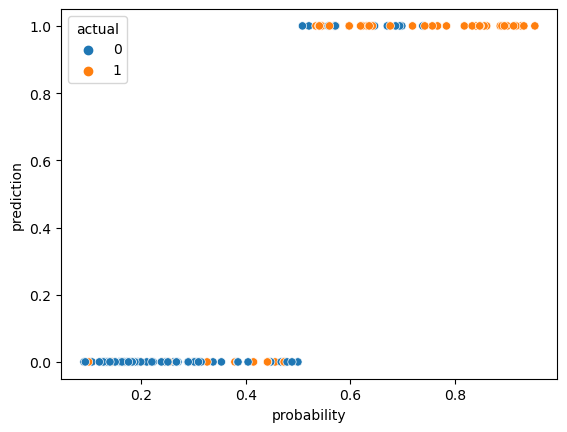

In [24]:
# Create an array of probabilities of surviving

y_pred_proba = logit6.predict_proba(X_test)
# select the 2nd item in the array to get prob of survival (1)
y_pred_proba = np.array([i[1] for i in y_pred_proba])

test_results = pd.DataFrame({'probability': y_pred_proba, 
                             'prediction': y_test_pred,
                             'actual': y_test})

sns.scatterplot(x='probability', y='prediction', 
                data=test_results, 
                hue='actual'
               )
plt.show()